In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np

# Final Project: N-Body

This notebook displays the results and answers the questions from the project guidelines. Not much analysis is done here, it is mostly just quantitative. Looking at the repository, there is a python file for each of the questions; [Part 1](P1.py), [Part 2](P2.py), [Part 3 (NonPeriodic)](P3_NonPeriodic.py), [Part 3 (Periodic)](P3_Periodic.py) and [Part 4](P4.py) (with the exception of Question 3, which has 2 python files). These files serve to initiate the NBody class, which I will get to later, for each of the questions. For all the problems (except the first two), there were $2^{17}$ particles generated in a ($2^{9}$,$2^9$) grid. I stuck with these numbers because I did not want the simulations to take forever to run. 

Gifs of the results could be found in the [Gifs](gifs), and the energy for each iteration for each question can be found in the [energy](Energy) folder. Some useful functions were defined in the [util.py](util.py), although I realized that writing this now, that I do not use half of the functions there. 

Anyways, more details can be found below about how I went about this project.

## NBody Class

This class uses the particle mesh method (PM) to compute the potential for a given potential grid. To calculate this density grid, the nearest grid point (NGP) density scheme was used. Why I used this method? It was the easiest to implement. I tried using the CIC (cloud-in-cell) method because I have read in some articles that it is the more standard way of doing this. However, I gave up after a few hours of it not working. 

To find the forces, we take the gradient of the potential, which is found by convoluting the density of the grid with the green function of the grid. These forces are then interpolated to the particles using the inverse mass scheme of the NGP. Leapfrog integration is used to update the position and the velocity of the particles. 

For Periodic boundary conditions, green's function was flipped on the boundary in order to get a periodic behavior. For non periodic boundary conditions, the grid was multiplied by two. This way, the particles do not feel any forces coming from the other side. Moreover, this was enforced by setting the potential to 0 on the boundary, and allowing no particles to exist on initialization. 

I tried doing this in 3D but my laptop was taking eons to finish a simple simulation, so I stuck with 2D. 

### Part 1 

Initializing a particle in the middle of the grid at rest is done in this problem. Up to no surprise, the particle does not move. Showed below is an animation with a 100 frames (trust, it is an animation lol). The grid size was $2^9$ and the particle had a mass of 10. 

In [2]:
HTML('<img src="./gifs/Part1.gif">')

### Part 2

Now, we wanted to show that a pair placed in a circular orbit continue to orbit each for a bit. Here I initialized a pair with a distance of about 20 in between them centered in the grid with size $2^9$ again. The velocities were both intially perpendicular with a magnitude of about 0.1. The softening constant was set to 0.1. 

In [3]:
HTML('<img src="./gifs/Part2.gif">')

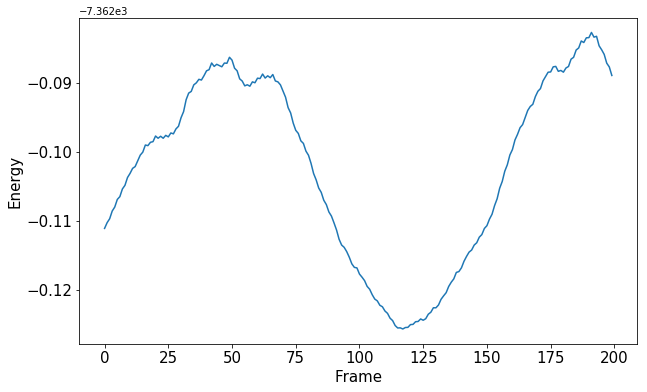

In [4]:
file = open('./energy/Part2.txt','r')
energies = [float(file.readline()) for i in range(200)]
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_xlabel("Frame", fontsize=15)
ax.set_ylabel("Energy", fontsize=15)
ax.tick_params(labelsize=15)
ax.plot(energies)

With very small oscillations around -7362, the energy can be considered to be conserved. 

### Part 3

In this section, we explore the effects of Periodic boundary conditions vs. non Periodic boundary conditions. The positions of the generated $2^{17}$ particles are scattered according to a random distribution in the grid. All masses are equal to a value of $\frac{1}{2^{17}}$. The softening constants for both cases were 0.8, and both ran for 300 frames (10 dt for Periodic and 5 dt for Non periodic. The latter is slower to see the effects of the collapse). Grid size was the same for both also; ($2^{9}$,$2^{9}$). 

#### Periodic Boundary Conditions

From the beginning, we see that the particles tend to group in clusters. As time progressed, clusters form into bigger clusters until there is about one cluster at the end. The total energy seems to be conserved again, despite very small oscillations. 

In [5]:
HTML('<img src="./gifs/Part3_Periodic.gif">')

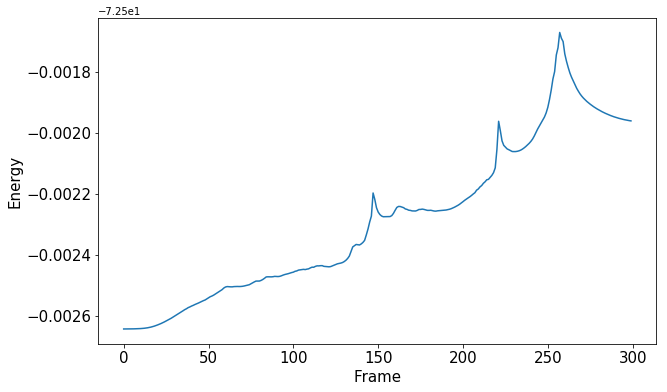

In [6]:
file = open('./Energy/Part3_Periodic_Energy.txt','r')
energies = [float(file.readline()) for i in range(300)]
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_xlabel("Frame", fontsize=15)
ax.set_ylabel("Energy", fontsize=15)
ax.tick_params(labelsize=15)
ax.plot(energies)

It seems that the trend of energy is increasing by a very small amount (or decreasing in magnitude). I expect this to happen since all the particles are tending to collapse to one point. So in a very long time scale, we should clearly see this trend. 

#### Non-Periodic Boundary Conditions

As previously mentioned, we use non periodic boundary conditions in this section of the problem. Now, all particles collapse towards the center, since there is nothing counterbalancing outwards. After the collapse, the particles get scattered around. I used the same parameters as the Periodic boundary but with dt smaller so we can get to see the collapse. 

In [7]:
HTML('<img src="./gifs/Part3_NonPeriodic.gif">')

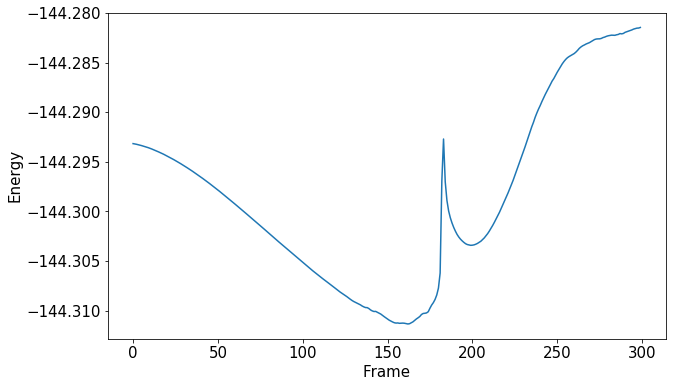

In [8]:
file = open('./Energy/Part3_NonPeriodic_Energy.txt','r')
energies = [float(file.readline()) for i in range(300)]
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_xlabel("Frame", fontsize=15)
ax.set_ylabel("Energy", fontsize=15)
ax.tick_params(labelsize=15)
ax.plot(energies)

As the collpase is happening, the energy deacreases (which makes sense since all the particles want to be bunched up together). However this reaches a minimum when they all collapse, afterwhich, the energy starts to increase slowly again. However, as one can see, the change is not very huge. Important to see that some clusters are forming as the whole thing is collapsing, which is pretty neat. 

### Part 4

Finally, we now scale the masses of the particle proportionally to the power spectrum, which is $\propto k^{-3}$. I choose an inital mass of 40 (which will be scaled by the $k^{-3}$) and a softening of about 10. I only changed the parameters to dt=330 and the frames to go up to 450. We realize in this part that structures are a lot more stable than problem 3; staying in place and attracting other small bodies instead. This has the added effects of creating a web like structure, which reminds me of how our universe looks like. The stability is due to the fact that there are some points were very high mass density (the clusters formed in the simulations below), while some points have very low mass density.  

In [9]:
HTML('<img src="./gifs/Part4.gif">')

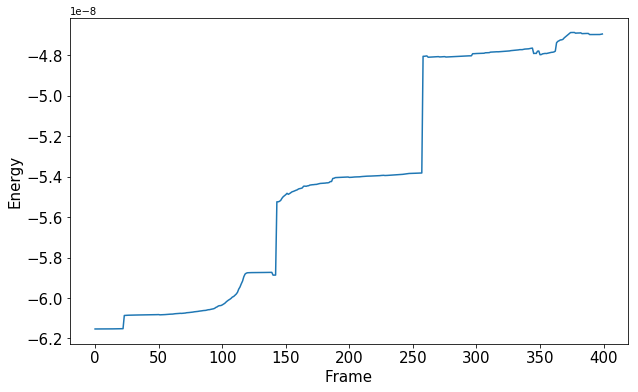

In [10]:
file = open('./Energy/Part4.txt','r')
energies = [float(file.readline()) for i in range(400)]
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_xlabel("Frame", fontsize=15)
ax.set_ylabel("Energy", fontsize=15)
ax.tick_params(labelsize=15)
ax.plot(energies)

As one can see the energy is not super well conserved in this case. I feel like this has to do with a lot of particles being intialized with next to 0 speed but as the simulation goes, they start to gain an acceleration due to other forces around, which increases the overall energy. This is probably wrong, but I cannot think of something else.